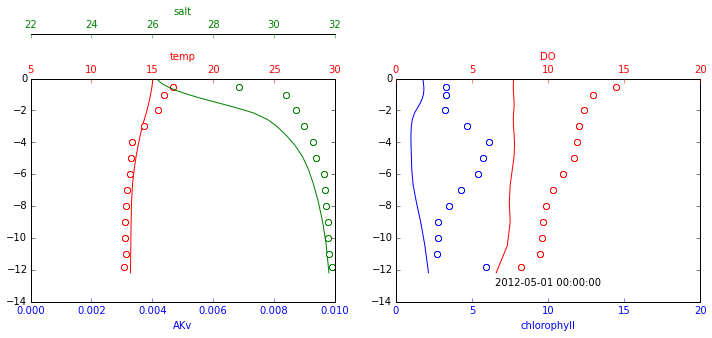

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4
from datetime import datetime
import numpy as np
import pandas as pd

import romspy

stafile = 'Z:/roms/Apps/OB500_fennelP/NL09/ob500_sta.nc'
obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

nc = netCDF4.Dataset(stafile, 'r')
obs = netCDF4.Dataset(obsfile, 'r')

def vplot(date, station):
    time = netCDF4.date2num(date, romspy.JST)
    mod_time = nc.variables['ocean_time'][:]
    t = np.where(mod_time==time)[0]
    akv = nc.variables['AKv'][t,station-1,:][0]
    rho = nc.variables['rho'][t,station-1,:][0]
    temp = nc.variables['temp'][t,station-1,:][0]
    salt = nc.variables['salt'][t,station-1,:][0]
    chlo = nc.variables['chlorophyll'][t,station-1,:][0]
    DO = nc.variables['oxygen'][t,station-1,:][0] * 32.0/1000.0
    cs_r = nc.variables['Cs_r'][:]
    cs_w = nc.variables['Cs_w'][:]
    h = nc.variables['h'][station]
    zeta = nc.variables['zeta'][t,station-1]
    depth = cs_r[:] * (h + zeta)
    depth_w = cs_w[:] * (h + zeta)
    
    fig, ax = plt.subplots(1, 2, figsize=[12,4])
    axes = [ax[0], ax[0].twiny(), ax[0].twiny()]
    axes1 = [ax[1], ax[1].twiny()]
    
    #fig.subplots_adjust(right=0.75)
    axes[-1].spines['top'].set_position(('axes', 1.2))
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)

    colors = ('Green', 'Red', 'Blue')
    axes[0].plot(akv, depth_w, 'b-')
    axes[0].set_xlabel('AKv', color='b')
    axes[0].tick_params(axis='x', colors='b')
    axes[0].set_xlim(0,0.01)
    
    axes[1].plot(temp, depth, 'r-')
    axes[1].set_xlabel('temp', color='r')
    axes[1].tick_params(axis='x', colors='r')
    axes[1].set_xlim(5,30)
    #axes[1].plot(rho, depth, 'r-')
    #axes[1].set_xlabel('rho', color='r')
    #axes[1].tick_params(axis='x', colors='r')
    #axes[1].set_xlim(15,25)
    
    axes[2].plot(salt, depth, 'g-')
    axes[2].set_xlabel('salt', color='g')
    axes[2].tick_params(axis='x', colors='g')
    axes[2].set_xlim(22,32)

    axes1[0].plot(chlo, depth, 'b-')
    axes1[0].set_xlabel('chlorophyll', color='b')
    axes1[0].tick_params(axis='x', colors='b')
    axes1[0].set_xlim(0,20.0)
    
    axes1[1].plot(DO, depth, 'r-')
    axes1[1].set_xlabel('DO', color='r')
    axes1[1].tick_params(axis='x', colors='r')
    axes1[1].set_xlim(0,20.0)
    
    ax[1].text(10, -13, datetime.strftime(date, '%Y-%m-%d %H:%M:%S'), ha='center')
    
    time = netCDF4.date2num(date, romspy.JST_days)
    obs_time = obs.variables['obs_time'][:]
    obs_station = obs.variables['obs_station'][:]
    index = np.where((obs_time==time) & (obs_station==station))[0]
    if len(index) > 0:
        obs_type = obs.variables['obs_type'][index]
        obs_depth = obs.variables['obs_depth'][index]
        obs_value = obs.variables['obs_value'][index]
        data={'depth':obs_depth, 'type':obs_type, 'value':obs_value}
        df = pd.DataFrame(data)
        varid = {'temp':6, 'salt':7, 'chlorophyll':10, 'oxygen':15}
        temp = df[df.type==varid['temp']]
        salt = df[df.type==varid['salt']]
        chlo = df[df.type==varid['chlorophyll']]
        DO = df[df.type==varid['oxygen']]
        #T = np.asarray(T.value)
        #S = np.asarray(S.value)
        #O2p = np.asarray(var.value)
        #var.value = O2p * O2_saturation(T, S) / 100.0

        axes[1].plot(temp.value, temp.depth, 'o', mec='r', mfc='w', mew=1)
        axes[2].plot(salt.value, salt.depth, 'o', mec='g', mfc='w', mew=1)
        axes1[0].plot(chlo.value, chlo.depth, 'o', mec='b', mfc='w', mew=1)
        axes1[1].plot(DO.value*32.0/1000.0, DO.depth, 'o', mec='r', mfc='w', mew=1)
    
    
vplot(datetime(2012, 5, 1, 0), 12)

f:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


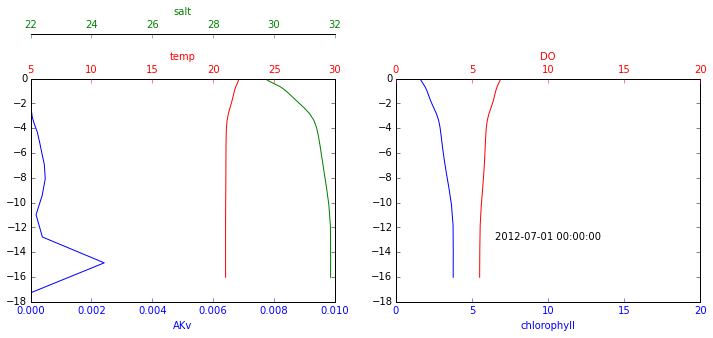

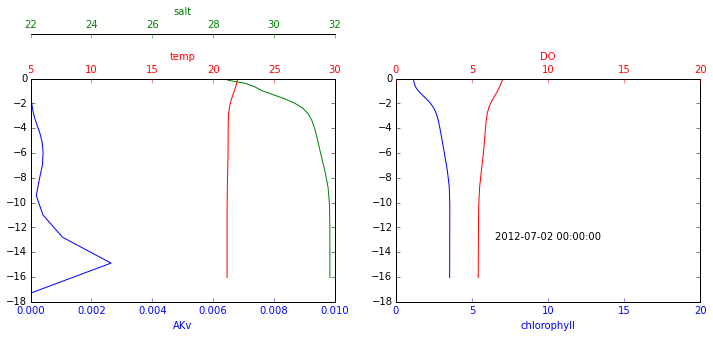

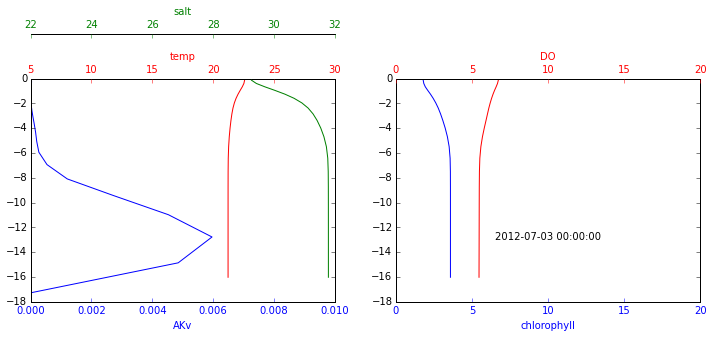

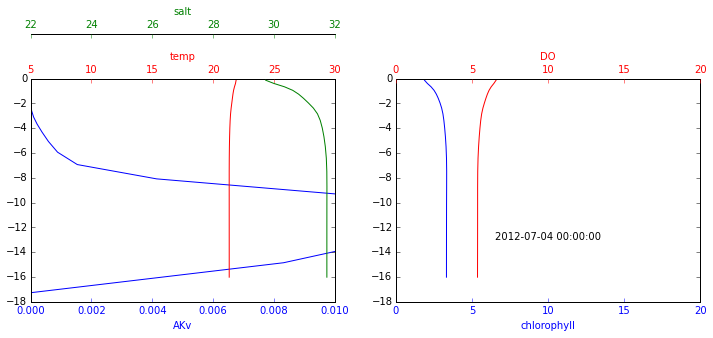

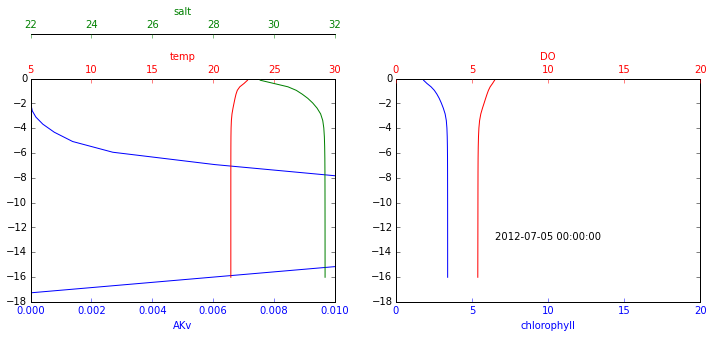

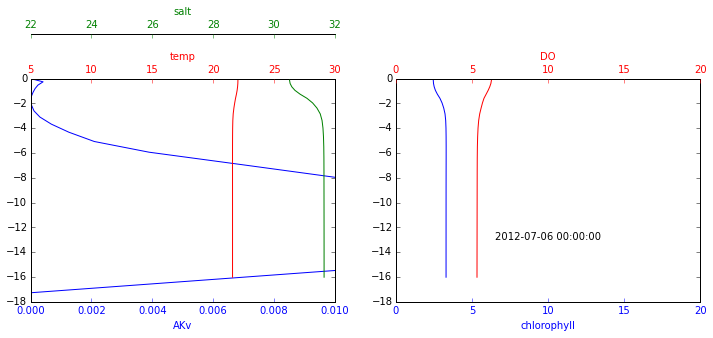

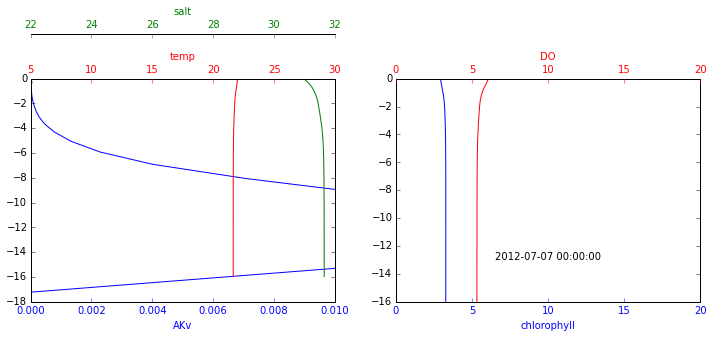

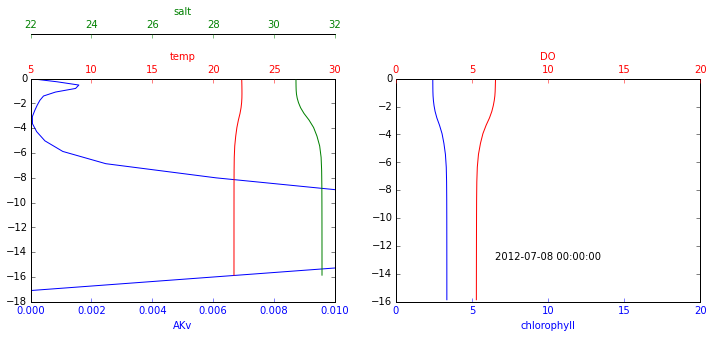

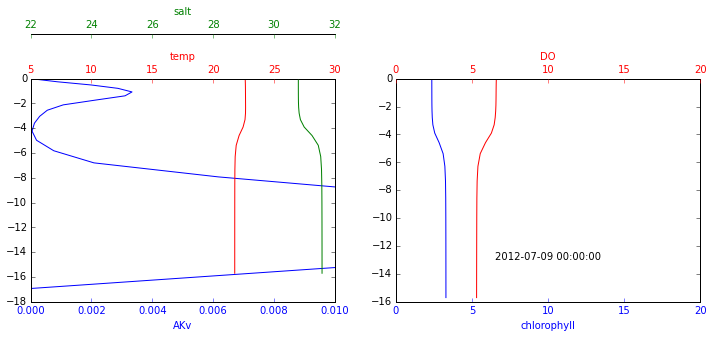

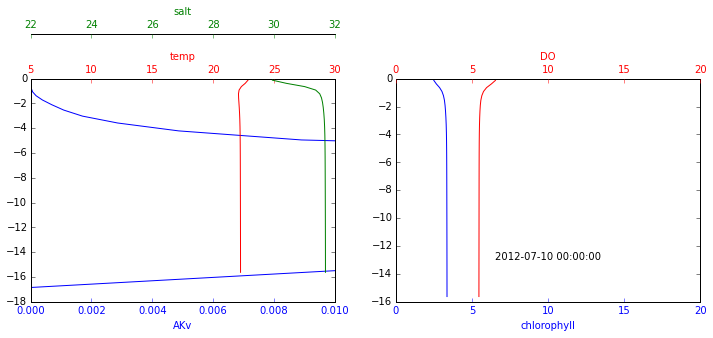

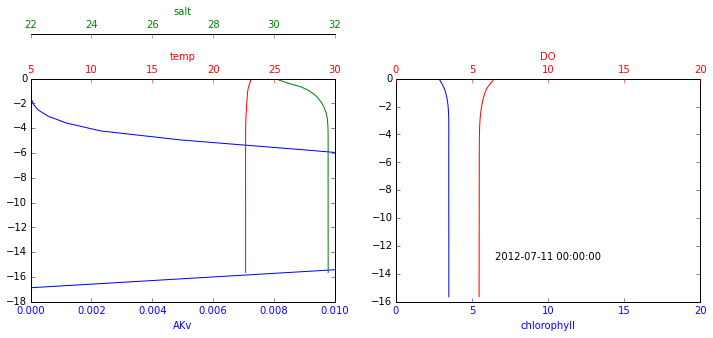

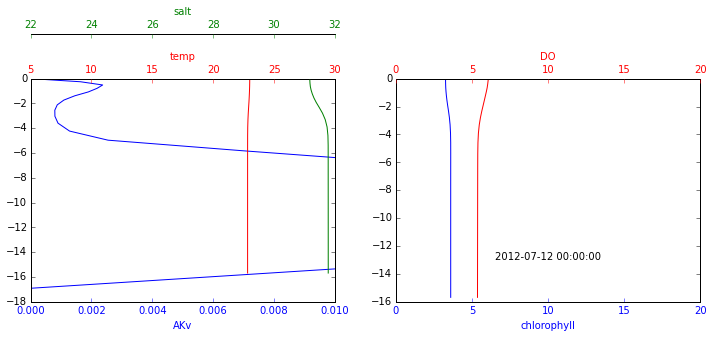

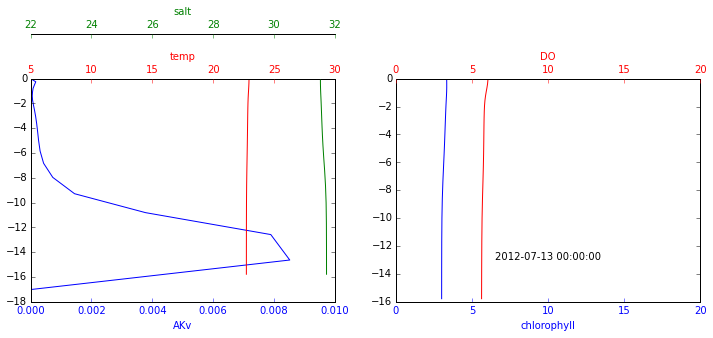

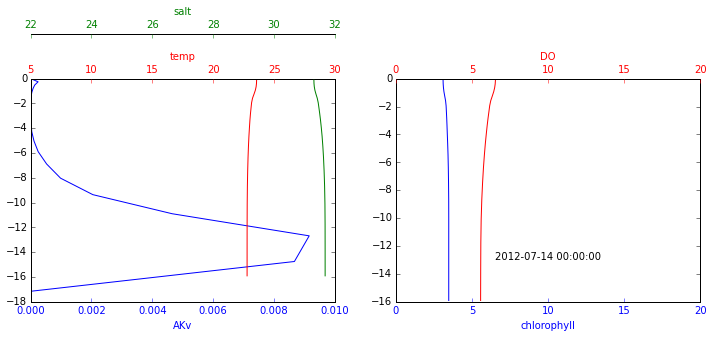

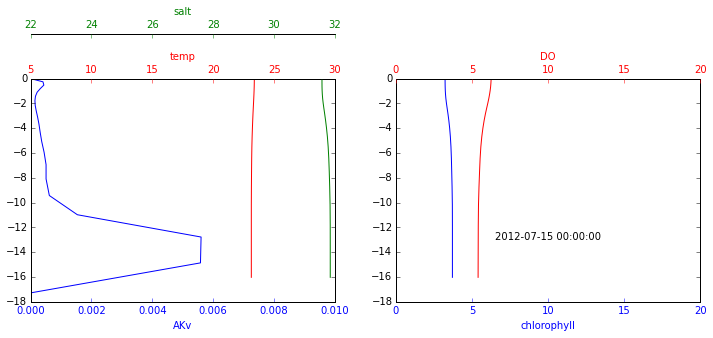

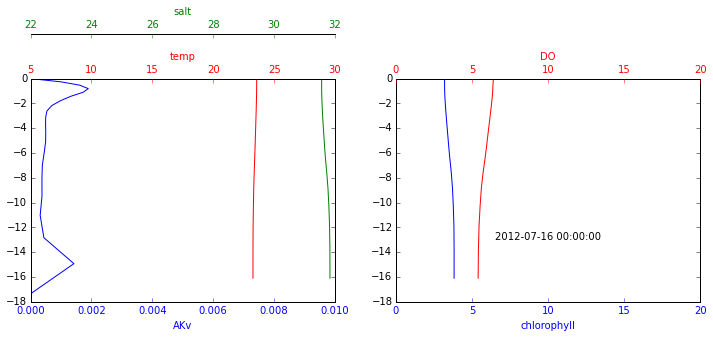

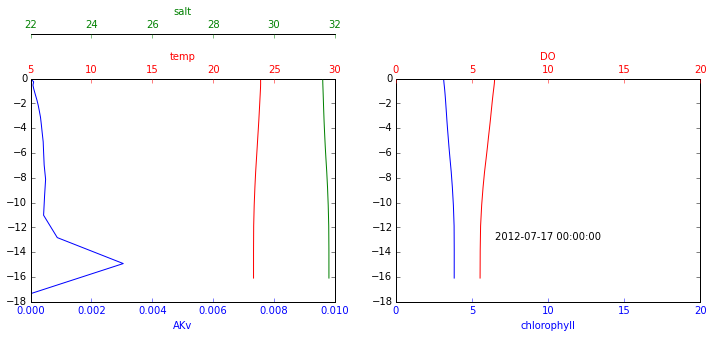

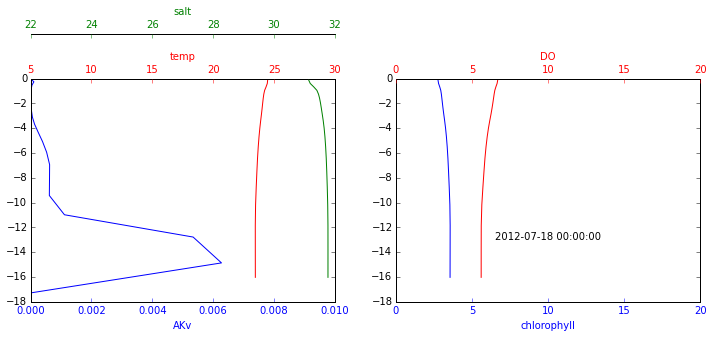

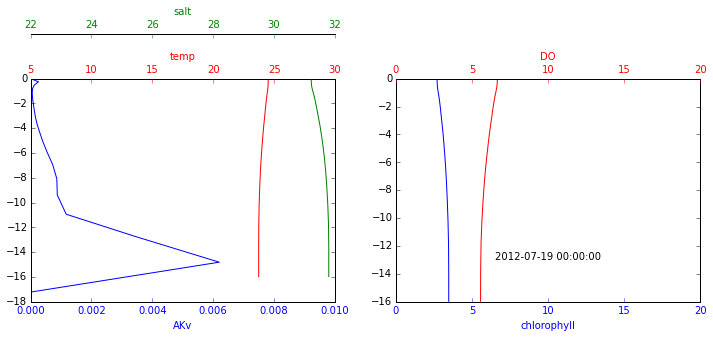

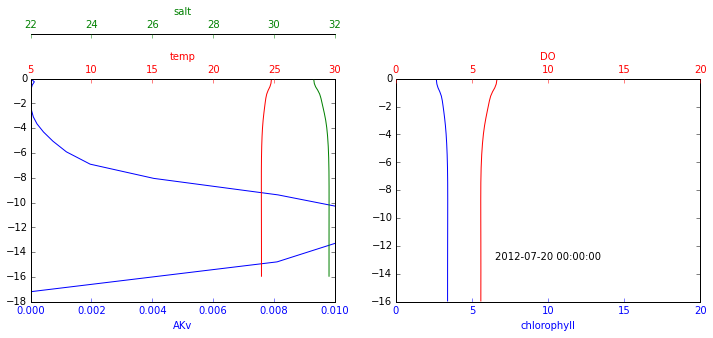

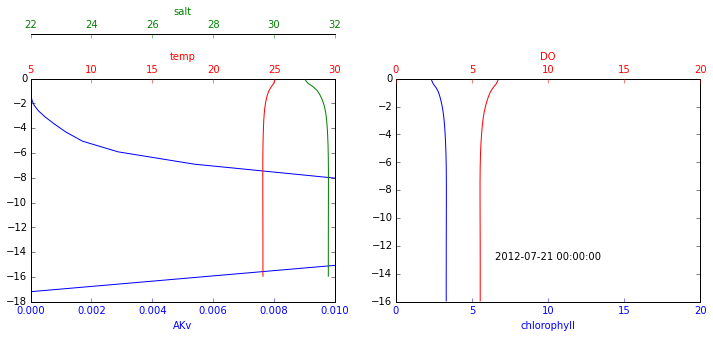

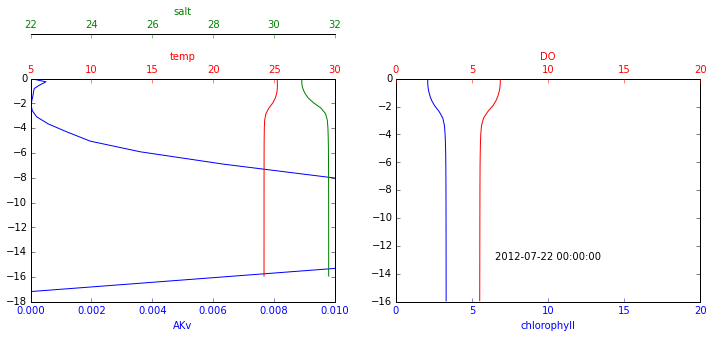

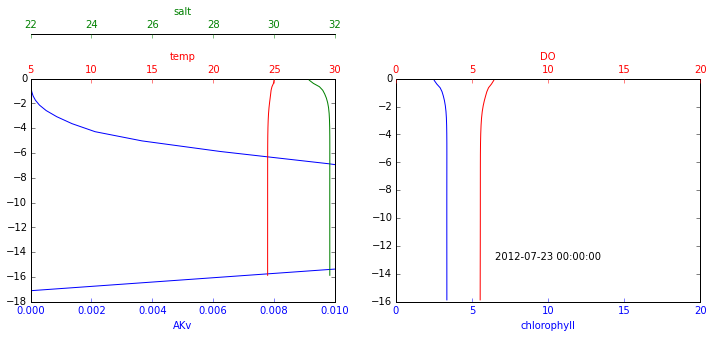

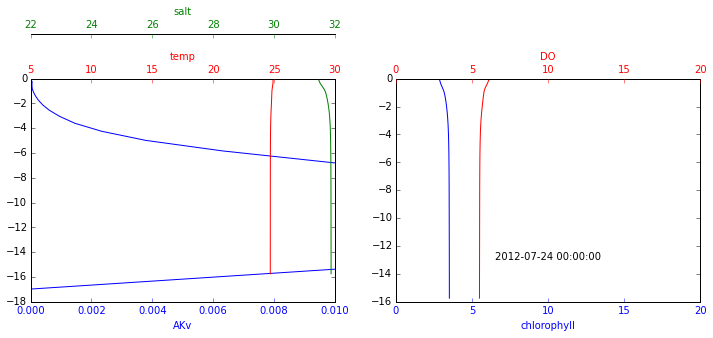

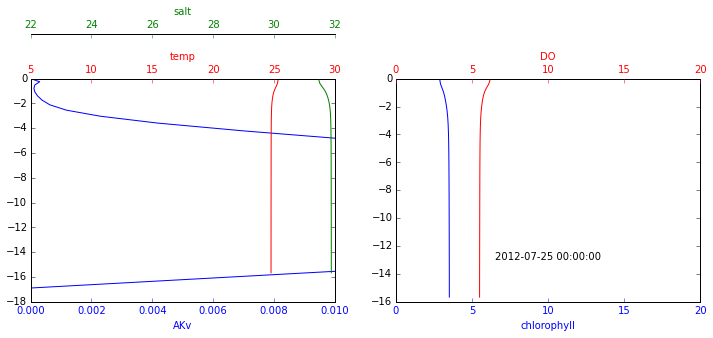

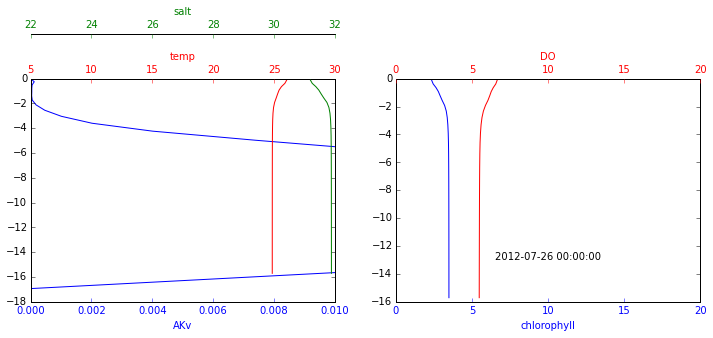

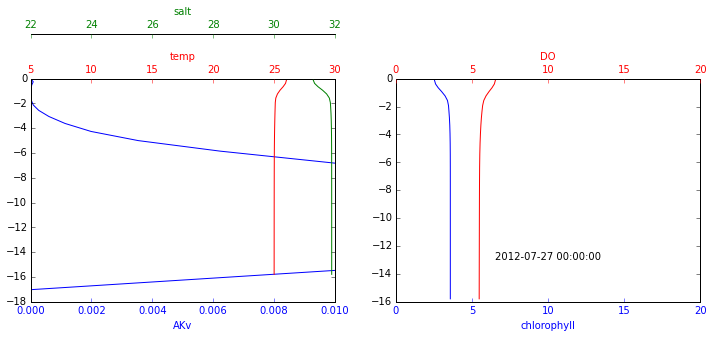

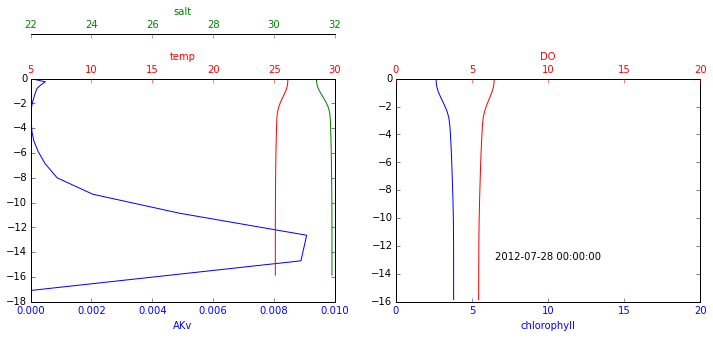

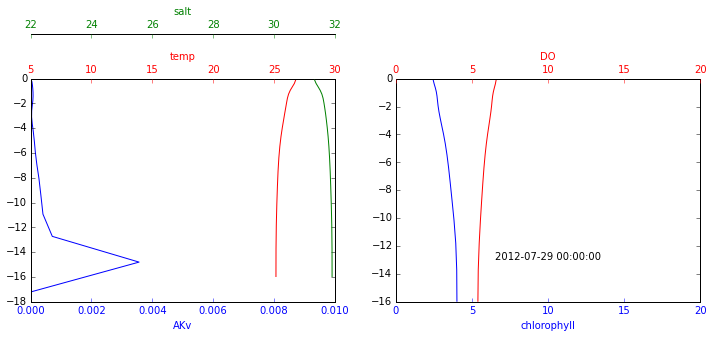

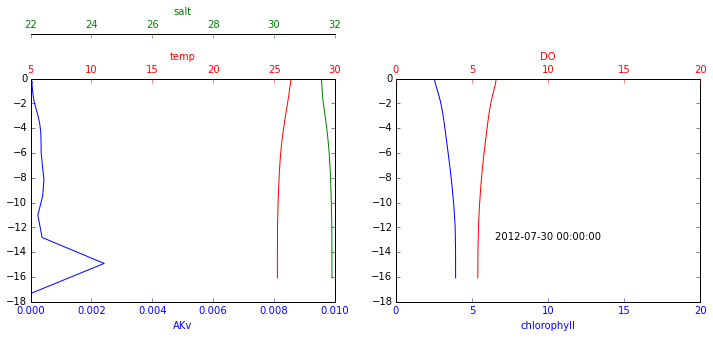

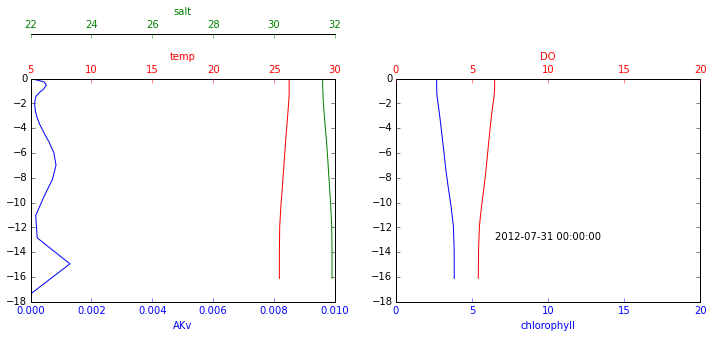

In [62]:
dates = pd.date_range(datetime(2012, 7, 1, 0), freq='D', periods=31).tolist()

for date in dates:
    vplot(date, 3)

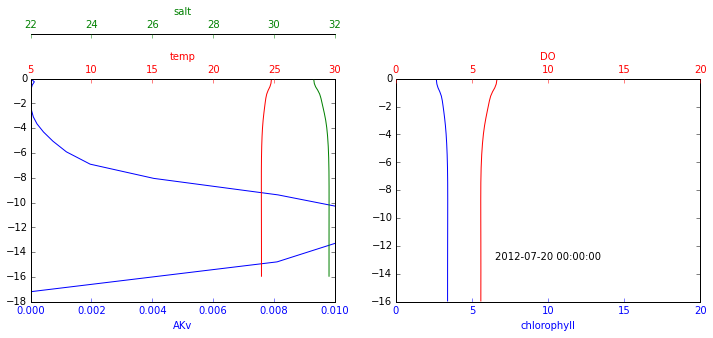

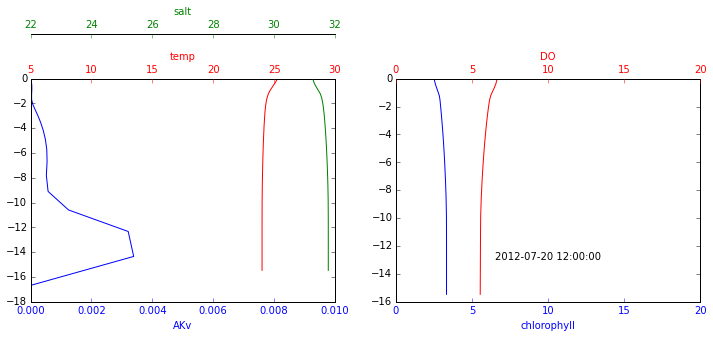

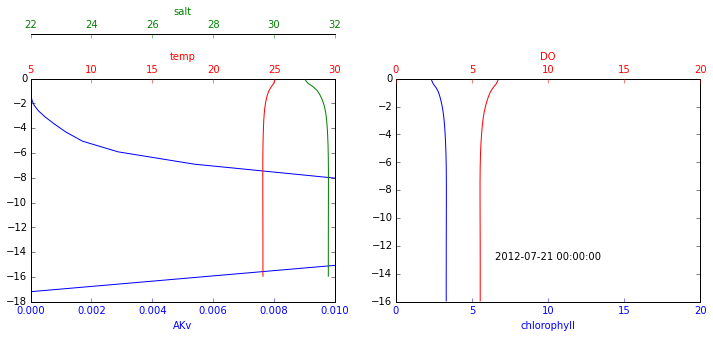

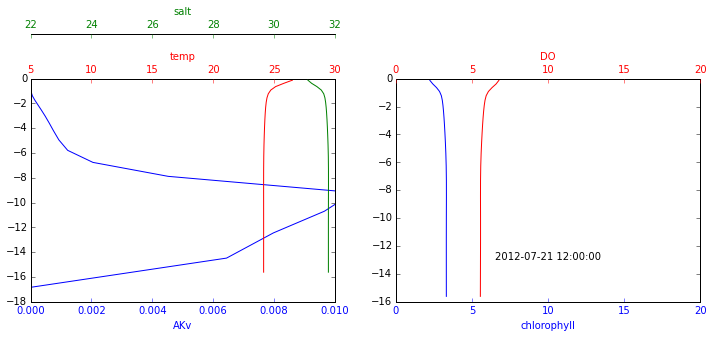

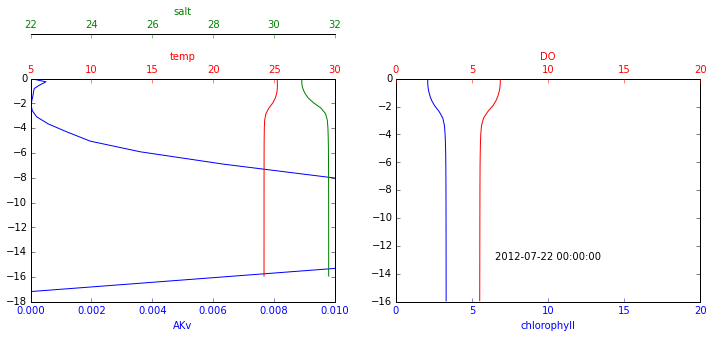

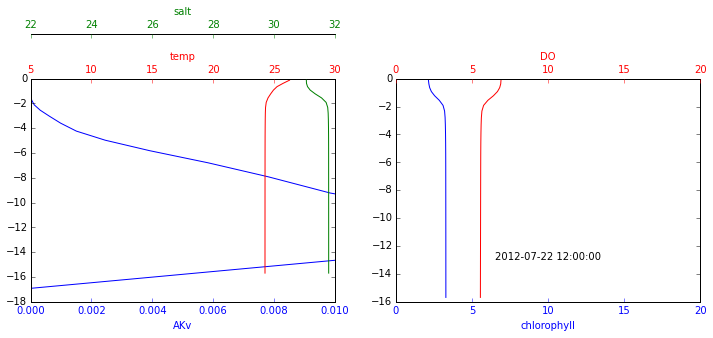

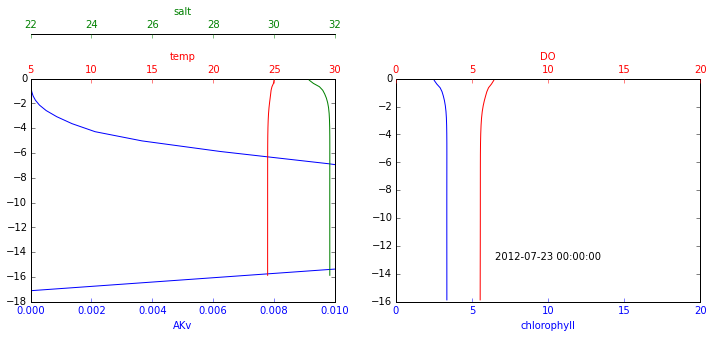

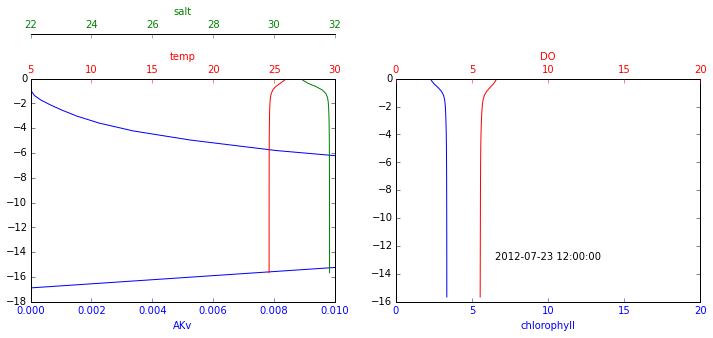

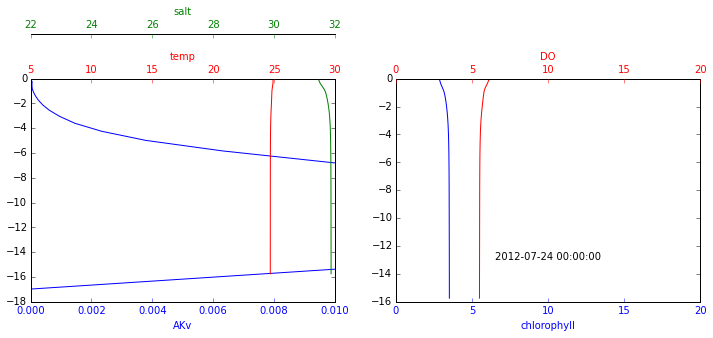

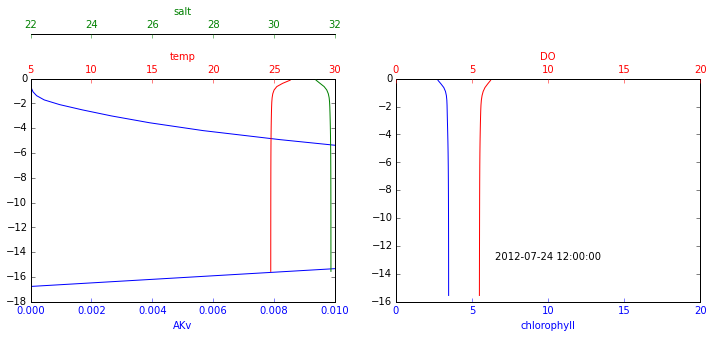

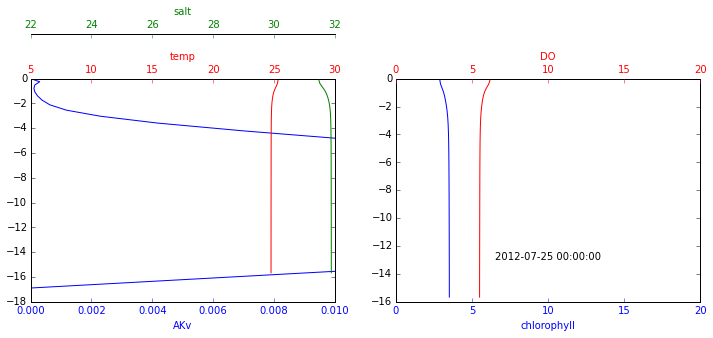

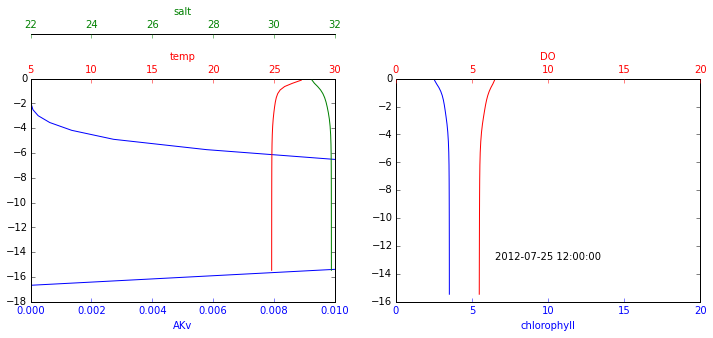

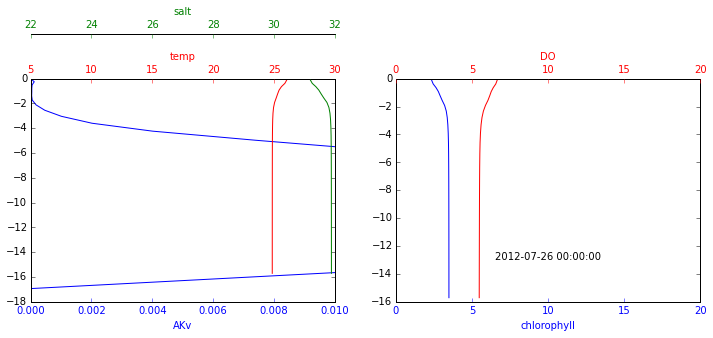

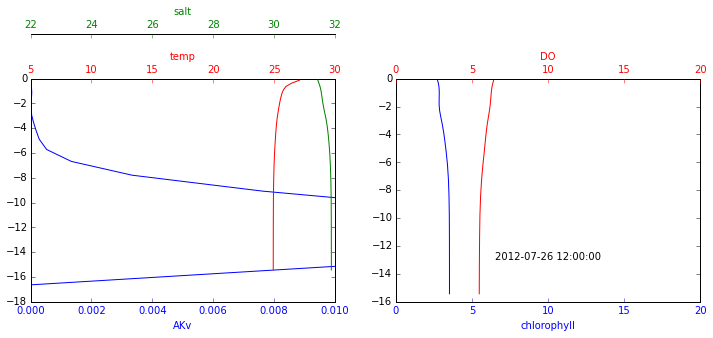

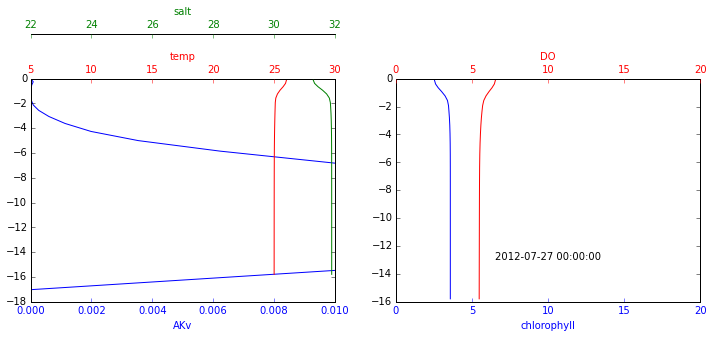

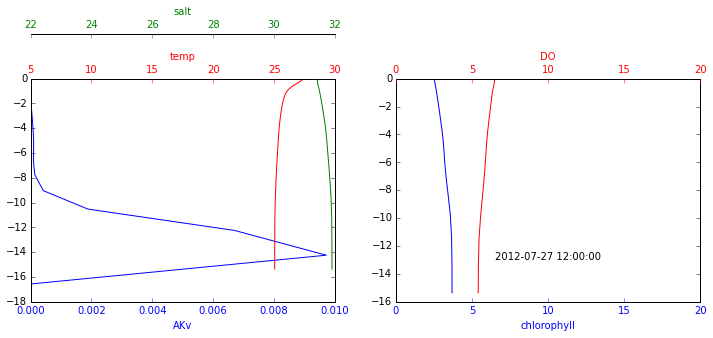

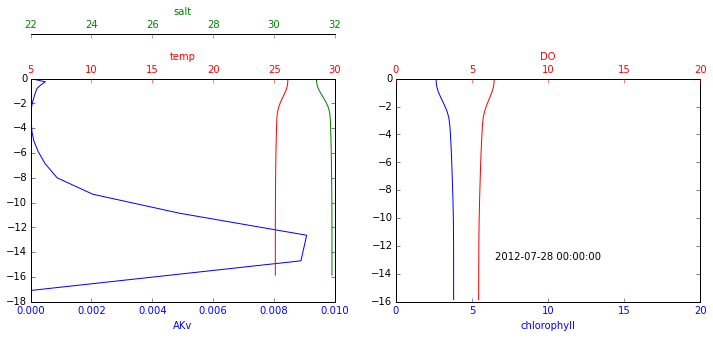

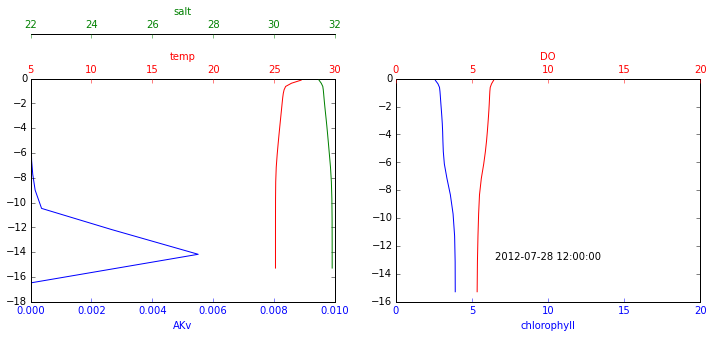

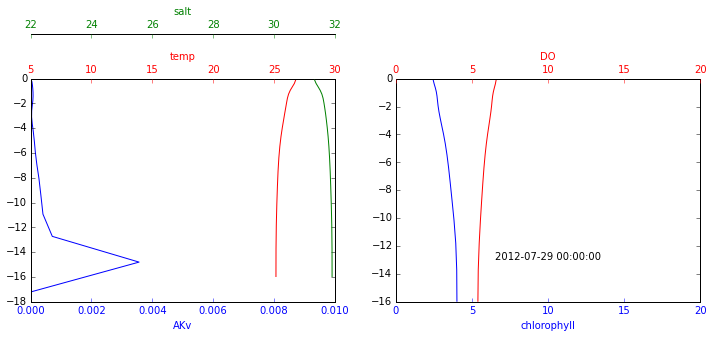

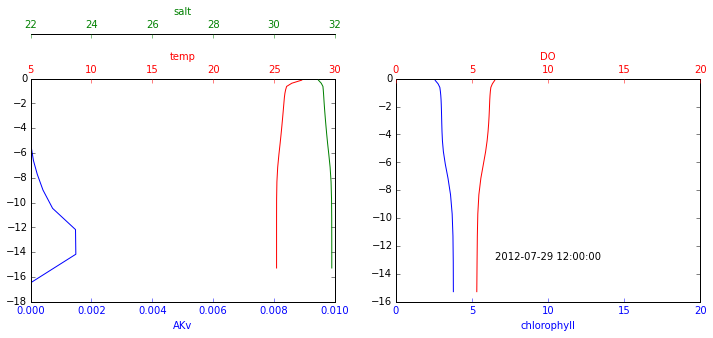

In [60]:
for date in dates:
    vplot(date, 3)